In [1]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn import datasets
import numpy as np
import pandas as pd

## 분류 평가

- 정확도(Accuracy): 가장 직관적으로 이해할 수 있는 지표로, 전체 예측 데이터 중 예측이 정확한 데이터의 비율을 의미합니다. 하지만 이는 불균형한 레이블 클래스를 가진 경우, 즉 특정 클래스의 데이터가 많을 때 모델의 성능을 왜곡할 수 있습니다.

- 오차 행렬(Confusion Matrix): 이진 분류에서 성능을 나타내는 행렬로, FP, FN, TP, TN의 4분면으로 이루어져 있습니다. 각각은 다음과 같습니다.

    - True Positive(TP): 실제 값과 예측 값이 모두 Positive(1)인 경우
    - False Positive(FP): 실제 값은 Negative(0)인데 Positive(1)로 잘못 예측한 경우
    - False Negative(FN): 실제 값은 Positive(1)인데 Negative(0)로 잘못 예측한 경우
    - True Negative(TN): 실제 값과 예측 값이 모두 Negative(0)인 경우
- 정밀도(Precision)와 재현율(Recall):

    - 정밀도: TP / (FP + TP). Positive로 예측한 대상 중에 실제 값이 Positive인 데이터의 비율을 의미합니다.
    - 재현율: TP / (FN + TP). 실제 값이 Positive인 대상 중에 예측과 실제 값이 모두 Positive인 데이터 비율을 의미합니다.
    - F1 스코어: 정밀도와 재현율을 결합한 지표로, 이 두 값이 어느 한 쪽으로 치우치지 않을 때 높은 값을 가집니다.

    - ROC-AUC: Receiver Operation Characteristic Curve와 이 곡선의 면적인 Area Under Curve를 의미합니다. 이진 분류의 예측 성능 측정에서 중요하게 사용되며, 1에 가까울수록 좋은 수치를 나타냅니다.

- 위의 지표들은 sklearn.metrics 모듈에서 제공하는 다양한 API를 통해 쉽게 계산할 수 있습니다. 이 지표들을 통해 모델의 성능을 평가하고, 모델 간 성능을 비교하거나, 하이퍼파라미터 튜닝 등을 통해 모델을 개선할 수 있습니다.

* TP, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
* 앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정/긍정을 의미
* TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했고 실제값은 Negative 값 0
* FN은 예측값을 Negative 값 0으로 예측했고 실제값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
* 정확도 = (TP + TN) / ( TP + TN + FP + FN)
* 정밀도 = TP / ( TP + FP)
* 재현율 = TP / ( TP + FN) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐.
* F1 = 2 * ( 정밀도 * 재현율) / (정밀도 + 재현율)
* 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단)
* 정밀도가 더 중요한 지표인 사례는 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생

### 과제1

전처리 사용자 함수 를 수정 보완하여 적용하고 알고리즘 dt를 사용하여 모델링 및 성능 평가 를 수행하세요

In [2]:
titanic_df = pd.read_csv('../machinerunning/data.machine/train.csv')
# titanic_df = pd.read_csv('../8.머신러닝/data/train.csv')
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
def get_category(age) :
    cat = ''
    if age <= 5 : cat = 'baby'
    elif age <= 12 : cat = 'child'
    elif age <= 18 : cat = 'student'
    elif age <= 25 : cat = 'teen'
    elif age <= 35 : cat = 'yadult'
    elif age <= 60 : cat = 'adult'
    else : cat = 'oldery'
        
    return cat


# null처리

def fillna(df) :
    df['name_title'] = df['Name'].str.extract(r', ([^\.]+).')
    name_title = df.groupby('name_title')['Age'].agg('mean').round().astype(int).reset_index()

    null_age = df['Age'].isnull()
    null_name = df.loc[null_age, 'name_title']
    mean_age = name_title.set_index('name_title')['Age']
    df.loc[null_age, 'Age'] = null_name.map(mean_age)
    
    df['Fare'].fillna(0, inplace = True)
    
    df['age_cat'] = df['Age'].apply(get_category)
    
    df['family'] = '0'
    df.loc[(df['SibSp'] > 0) | (df['Parch'] > 0), 'family'] = '1'
    
    df['Age'] = df['Age'].astype(int)
    
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
    
    return df

# 레이블 인코딩 수행

def format_features(df) :
    features = [ 'Sex', 'age_cat', 'family', 'name_title']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df
# 앞에서 설정한 data preprocessing 함수 호출

def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [4]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('../machinerunning/data.machine/train.csv')
# titanic_df = pd.read_csv('../8.머신러닝/data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int32  
 2   Age         891 non-null    int32  
 3   Fare        891 non-null    float64
 4   name_title  891 non-null    int32  
 5   age_cat     891 non-null    int32  
 6   family      891 non-null    int32  
dtypes: float64(1), int32(5), int64(1)
memory usage: 31.4 KB


In [5]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할 후 학습 및 예측
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('../machinerunning/data.machine/train.csv')
# titanic_df = pd.read_csv('../8.머신러닝/data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr

0.8659217877094972

In [6]:
# 테스트 데이터에 대한 예측 확률과 예측값을 계산하고 출력하는 코드

pred_proba = lr_clf.predict_proba(X_test) # predict_proba 함수는 입력 데이터의 각 클래스에 대한 예측 확률을 반환
pred = lr_clf.predict(X_test)
print(type(pred_proba[:3])) # 배열의 첫 3개행 출력
type(pred.reshape(-1,1))
pred.reshape(-1,1)[:3]
pred_proba[:3]

<class 'numpy.ndarray'>


array([[0.47841874, 0.52158126],
       [0.89756986, 0.10243014],
       [0.91091231, 0.08908769]])

In [7]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(pred_proba.shape, '\n')
print(pred_proba[:3], '\n')

print(pred[:3], '\n')
print(pred.reshape(-1,1)[:3], '\n')
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print(pred_proba_result[:3])
type(pred_proba_result)

(179, 2) 

[[0.47841874 0.52158126]
 [0.89756986 0.10243014]
 [0.91091231 0.08908769]] 

[1 0 0] 

[[1]
 [0]
 [0]] 

[[0.47841874 0.52158126 1.        ]
 [0.89756986 0.10243014 0.        ]
 [0.91091231 0.08908769 0.        ]]


numpy.ndarray

In [8]:
# 시이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정
# threshold 변수를 특정 값으로 설정하고 사이킷런의 Binarizer 클래스를 객체로 생성
# fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray의 값이
# threshold보다 같거나 작으면 0, 크면 1값 반환

from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [9]:
# 생존확률을 선택해서 임곗값 0.5를 기준과 비교하여 예측

from sklearn.preprocessing import Binarizer
custom_threshold = 0.5
print('pred_proba: \n', pred_proba[0:5])
print()

# 생존 확률 추출 후 2차원 배열로 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print('생존확률: \n', pred_proba_1[0:5])
print()
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[0:5]

pred_proba: 
 [[0.47841874 0.52158126]
 [0.89756986 0.10243014]
 [0.91091231 0.08908769]
 [0.85596952 0.14403048]
 [0.78157574 0.21842426]]

생존확률: 
 [[0.52158126]
 [0.10243014]
 [0.08908769]
 [0.14403048]
 [0.21842426]]



array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [10]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0: .4f}, 정밀도 : {1: .4f}, 재현율 : {2: .4f}, f1 score: {3: .4f}'.format(accuracy, precision, recall, f1))
get_clf_eval(y_test, custom_predict)

오차행렬
[[107  11]
 [ 13  48]]
정확도 :  0.8659, 정밀도 :  0.8136, 재현율 :  0.7869, f1 score:  0.8000


In [11]:
acc = (107 + 46) / (107 + 11 + 15 + 46)
pre = (46) / (11 + 46)
recall = 46 / (15 + 46)
f1 = 2 * (pre * recall) / (pre + recall)

print(round(acc, 4))
print(round(pre, 4))
print(round(recall, 4))
print(round(f1, 4))

0.8547
0.807
0.7541
0.7797


In [12]:
# 분류 결정 임계값은 양성 예측값을 결정하는 확률의 기준
# 임계값을 낮출수록 참 값이 많아지게 되며 양성 예측값이 많아지면  fn은 하락해서 재현율은 올라감
# binarizer의 threshold 설정값을 0.4로 설정 즉 0.5에서 0.4로 낮춤

custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarize  = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[107  11]
 [ 13  48]]
정확도 :  0.8659, 정밀도 :  0.8136, 재현율 :  0.7869, f1 score:  0.8000


In [13]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, threshold) :
    
    for custom_threshold in threshold :
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값', custom_threshold)
        
        get_clf_eval(y_test, custom_predict)
        print()
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값 0.4
오차행렬
[[94 24]
 [ 8 53]]
정확도 :  0.8212, 정밀도 :  0.6883, 재현율 :  0.8689, f1 score:  0.7681

임계값 0.45
오차행렬
[[96 22]
 [10 51]]
정확도 :  0.8212, 정밀도 :  0.6986, 재현율 :  0.8361, f1 score:  0.7612

임계값 0.5
오차행렬
[[107  11]
 [ 13  48]]
정확도 :  0.8659, 정밀도 :  0.8136, 재현율 :  0.7869, f1 score:  0.8000

임계값 0.55
오차행렬
[[109   9]
 [ 19  42]]
정확도 :  0.8436, 정밀도 :  0.8235, 재현율 :  0.6885, f1 score:  0.7500

임계값 0.6
오차행렬
[[114   4]
 [ 25  36]]
정확도 :  0.8380, 정밀도 :  0.9000, 재현율 :  0.5902, f1 score:  0.7129



In [14]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
type(thresholds)
print(thresholds.shape)
pd.Series(thresholds).value_counts
thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
np.round(thresholds[thr_index], 2)

(146,)
[  0  15  30  45  60  75  90 105 120 135]


array([0.09, 0.1 , 0.13, 0.22, 0.27, 0.44, 0.51, 0.6 , 0.79, 0.91])

In [15]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
print(pred_proba_class1[0:10])
print()

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape : ', thresholds.shape)
print('정밀도 : ', precisions[0:5])
print('재현율 : ', recalls[0:5])
print('임계값 : ', thresholds[0:5])
print('\n')
print(pd.Series(thresholds).value_counts)
print('\n')
thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print()
print(np.round(thresholds[thr_index], 2))

[0.52158126 0.10243014 0.08908769 0.14403048 0.21842426 0.16015393
 0.08908368 0.66996715 0.26486184 0.67748133]

반환된 분류 결정 임계값 배열의 shape :  (146,)
정밀도 :  [0.38125    0.37974684 0.38216561 0.37820513 0.38562092]
재현율 :  [1.         0.98360656 0.98360656 0.96721311 0.96721311]
임계값 :  [0.08908782 0.08908848 0.08908869 0.08908903 0.08909031]


<bound method IndexOpsMixin.value_counts of 0      0.089088
1      0.089088
2      0.089089
3      0.089089
4      0.089090
         ...   
141    0.929269
142    0.930787
143    0.935718
144    0.937600
145    0.939838
Length: 146, dtype: float64>


[  0  15  30  45  60  75  90 105 120 135]

[0.09 0.1  0.13 0.22 0.27 0.44 0.51 0.6  0.79 0.91]


[0.52158126 0.10243014 0.08908769 0.14403048 0.21842426 0.16015393
 0.08908368 0.66996715 0.26486184 0.67748133]


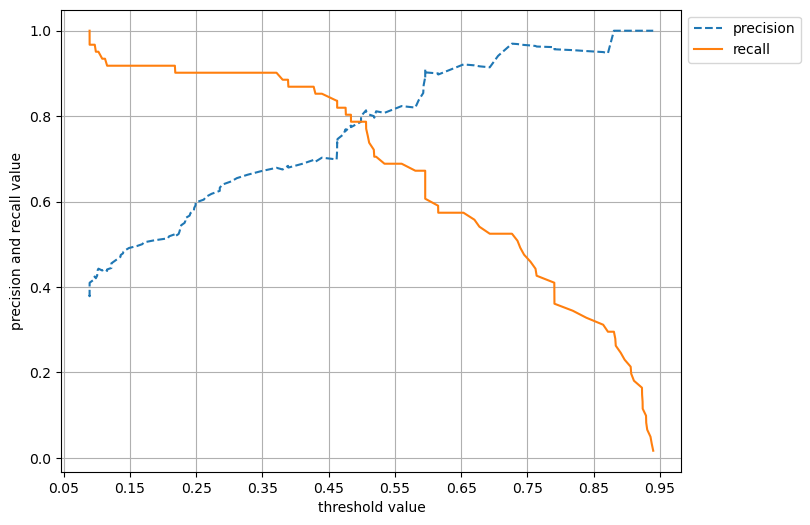

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class1[0:10])

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
# 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화

import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1) :
    # threshold ndarry와 threshold에 따른 정밀도 재현율 ndarray추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize =(8,6))
    threshold_boundary = thresholds.shape[0]
    
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('threshold value')
    plt.ylabel('precision and recall value')
    plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

#### ROC 곡선과 AUC
* 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표.
* FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1- 특이성(TNR), TPR은 재현율(민감도)를 나타냄.
* TNR은 TN/(TN+FP)이며 FPR은 FP/(TN+FP)임
* ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR값의 변화에 따른 TPR의 변화 값을 구함.
* FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨. 
* FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정하면 됨.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

diabetes_data = pd.read_csv('../machinerunning/data.machine/diabetes.csv')
# diabetes_data = pd.read_csv('../8.머신러닝/data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(10)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [18]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [20]:
def get_clf_eval(y_test = None, pred = None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuarcy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬 : \n', confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, auc: {:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

###  diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'

In [21]:
def precision_recall_curve_plot(y_test = None, pred_proba_c1 = None) :
    
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (8,6))
    
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('threshold value')
    plt.ylabel('precision and recall value')
    plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
    plt.grid()

### 과제2 랜덤하게 2차원 배열을 생성한 후 임계값을 0.5로 지정한 후 임계값 보다 크면 1 작으면 0으로 변환하세요

In [22]:
arr = np.arange(9).reshape(3,3)

binarizer = Binarizer(threshold = 0.5)
print(binarizer.fit_transform(arr))

[[0 1 1]
 [1 1 1]
 [1 1 1]]


ROC 곡선(Receiver Operating Characteristic curve), AUC
- 분류 모델의 성능을 시각화하는 데 사용되는 그래프입니다.
- 이 그래프는 분류 모델의 임계값(threshold)을 변화시키면서, True Positive Rate(TPR)에 대한 FPR의 변화를 나타냅니다.
- FPR은 "False Positive Rate"의 약자로, 거짓 양성 비율을 나타내는 지표입니다. 
    - TPR = TP / (TP + FN)
    - FPR = FP / (FP + TN) = 1 - 특이도(TN/(FP + TN))
- FPR은 0부터 1까지의 값을 가지며, 분류 모델의 임계값에 따라 변화합니다. 
- 임계값이 낮을수록 모델은 더 많은 샘플을 양성으로 분류하며, 이로 인해 FPR은 증가합니다. 
- 임계값이 높을수록 모델은 더 많은 샘플을 음성으로 분류하며, FPR은 감소합니다.
- ROC 곡선은 FPR을 x축에, TPR(민감도, True Positive Rate)를 y축에 나타냅니다. 따라서 ROC 곡선은 임계값 변화에 따른 모델의 TPR과 FPR의 관계를 보여줍니다. 
- 좋은 분류 모델은 FPR이 낮은 상태에서 높은 TPR을 유지하는 곡선이 되어야 합니다. 
- ROC 곡선의 아래쪽 면적인 AUC(Area Under the Curve)는 분류 모델의 성능을 종합적으로 평가하는 지표로 사용됩니다. 
- AUC가 1에 가까울수록 모델의 성능이 우수하다고 판단할 수 있습니다.

### 과제3 타이타닉 데이터셋으로 모델링한 후 모든 roc auc를 포함한 분류 평가 지표를 사용하여 평가하고 roc auc시각화



In [23]:
titanic_df = pd.read_csv('../machinerunning/data.machine/train.csv')
# titanic_df = pd.read_csv('../8.머신러닝/data/train.csv')

titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
def get_category(age) :
    cat = ''
    if age <= 5 : cat = 'baby'
    elif age <= 12 : cat = 'child'
    elif age <= 18 : cat = 'student'
    elif age <= 25 : cat = 'teen'
    elif age <= 35 : cat = 'yadult'
    elif age <= 60 : cat = 'adult'
    else : cat = 'oldery'
        
    return cat


# null처리

def fillna(df) :
    df['name_title'] = df['Name'].str.extract(r', ([^\.]+).')
    name_title = df.groupby('name_title')['Age'].agg('mean').round().astype(int).reset_index()

    null_age = df['Age'].isnull()
    null_name = df.loc[null_age, 'name_title']
    mean_age = name_title.set_index('name_title')['Age']
    df.loc[null_age, 'Age'] = null_name.map(mean_age)
    
    df['Fare'].fillna(0, inplace = True)
    
    df['age_cat'] = df['Age'].apply(get_category)
    
    df['family'] = 'X'
    df.loc[(df['SibSp'] > 0) | (df['Parch'] > 0), 'family'] = 'O'
    
    df['Age'] = df['Age'].astype(int)
    
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
    
    return df

# 레이블 인코딩 수행

def format_features(df) :
    features = [ 'Sex', 'age_cat', 'family', 'name_title']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df
# 앞에서 설정한 data preprocessing 함수 호출

def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [25]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 

titanic_df = pd.read_csv('../machinerunning/data.machine/train.csv')
# titanic_df = pd.read_csv('../8.머신러닝/data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int32  
 2   Age         891 non-null    int32  
 3   Fare        891 non-null    float64
 4   name_title  891 non-null    int32  
 5   age_cat     891 non-null    int32  
 6   family      891 non-null    int32  
dtypes: float64(1), int32(5), int64(1)
memory usage: 31.4 KB


In [29]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할 후 학습 및 예측
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('../machinerunning/data.machine/train.csv')
# titanic_df = pd.read_csv('../8.머신러닝/data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr

0.8603351955307262

In [31]:
def get_clf_eval(y_test = None, pred = None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬 : \n', confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test = y_test, pred = pred, pred_proba = pred_proba)

오차행렬 : 
 [[107  11]
 [ 14  47]]
정확도 : 0.8603, 정밀도 : 0.8103, 재현율: 0.7705, f1: 0.7899, roc_auc: 0.8955


### 과제4 피마 당뇨병 데이터셋으로 다음을 수행하세요

- 예측 모델 생성 : dt 적용 및 (분류 평가 모든 지표적용)
- precision_recall_curve를 시각화 하여 trade off 관계 확인
- 재현율에 비중을 좀 더 부여 하는 것이 필요한 상황을 전제로 적절한 임계값을 구하세요

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

diabetes_data = pd.read_csv('../machinerunning/data.machine/diabetes.csv')
# diabetes_data = pd.read_csv('../8.머신러닝/data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(10)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [33]:
X = diabetes_data.iloc[:, : -1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)

get_clf_eval(y_test = y_test, pred = pred, pred_proba = pred_proba)

ValueError: y should be a 1d array, got an array of shape (154, 2) instead.

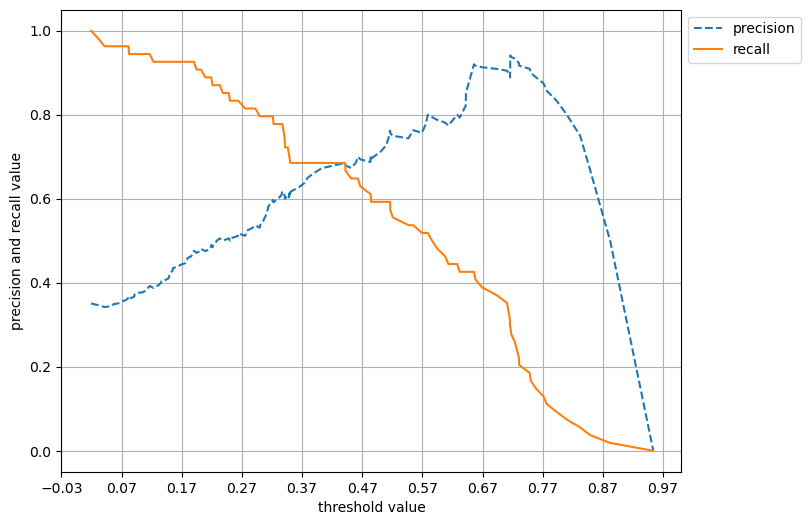

In [34]:
def precision_recall_curve_plot(y_test = None, pred_proba_c1 = None) :
    
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (8,6))
    
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('threshold value')
    plt.ylabel('precision and recall value')
    plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
    plt.grid()


pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba_class1)

In [35]:
# 0값을 검사할 피처명 리스트 객체 설정

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_data['Glucose'].count()

for feature in zero_features :
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count)) # 평균값 대체

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [36]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [37]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify =y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬 : 
 [[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율: 0.6111, f1: 0.6804, roc_auc: 0.8433


In [39]:
pred_proba_c1 = pred_proba.reshape(-1, 1)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds) :
    
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)
        print()

In [40]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
get_eval_by_threshold(y_test, pred_proba_c1, thresholds)

임계값 :  0.3
오차행렬 : 
 [[67 33]
 [11 43]]
정확도 : 0.7143, 정밀도 : 0.5658, 재현율: 0.7963, f1: 0.6615, roc_auc: 0.8433

임계값 :  0.33
오차행렬 : 
 [[72 28]
 [12 42]]
정확도 : 0.7403, 정밀도 : 0.6000, 재현율: 0.7778, f1: 0.6774, roc_auc: 0.8433

임계값 :  0.36
오차행렬 : 
 [[76 24]
 [15 39]]
정확도 : 0.7468, 정밀도 : 0.6190, 재현율: 0.7222, f1: 0.6667, roc_auc: 0.8433

임계값 :  0.39
오차행렬 : 
 [[78 22]
 [16 38]]
정확도 : 0.7532, 정밀도 : 0.6333, 재현율: 0.7037, f1: 0.6667, roc_auc: 0.8433

임계값 :  0.42
오차행렬 : 
 [[84 16]
 [18 36]]
정확도 : 0.7792, 정밀도 : 0.6923, 재현율: 0.6667, f1: 0.6792, roc_auc: 0.8433

임계값 :  0.45
오차행렬 : 
 [[85 15]
 [18 36]]
정확도 : 0.7857, 정밀도 : 0.7059, 재현율: 0.6667, f1: 0.6857, roc_auc: 0.8433

임계값 :  0.48
오차행렬 : 
 [[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율: 0.6481, f1: 0.6931, roc_auc: 0.8433

임계값 :  0.5
오차행렬 : 
 [[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율: 0.6111, f1: 0.6804, roc_auc: 0.8433



In [41]:
get_eval_by_threshold(y_test, pred_proba_c1, [0.33, 0.48])

임계값 :  0.33
오차행렬 : 
 [[72 28]
 [12 42]]
정확도 : 0.7403, 정밀도 : 0.6000, 재현율: 0.7778, f1: 0.6774, roc_auc: 0.8433

임계값 :  0.48
오차행렬 : 
 [[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율: 0.6481, f1: 0.6931, roc_auc: 0.8433

